<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week11/simple_neural_network_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Neural Network Exercise
- Michael Vincent
- 8/25

## Imports

In [233]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Load the data

In [234]:
# Load the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQPIHj2zduhCmXT44ZMBjUJ6d0CaFmEIheo4D0k-4jJGD-po7W-mebgUCYxxzVfpi3qLI_vKwOp4U3F/pub?output=csv'
df = pd.read_csv(url)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Clean the data

In [235]:
# Check for duplicates and missing values
print('Duplicates:', df.duplicated().sum())
print('Missing Values:', df.isna().sum().sum())

Duplicates: 0
Missing Values: 0


In [236]:
# Check for inconsistent labels
cat_cols = df.select_dtypes(include = 'object')
for col in cat_cols:
  print(col)
  print(df[col].value_counts())

Sex
M    725
F    193
Name: Sex, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
ExerciseAngina
N    547
Y    371
Name: ExerciseAngina, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


In [237]:
# Check the balance
df['HeartDisease'].mean()

0.5533769063180828

> Data looks reasonably clean. We will move on to modeling.

## Process the data

In [238]:
# Set the features and target
X = df.drop(columns = 'HeartDisease')
y = df['HeartDisease']

In [239]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## Column Transformer

In [240]:
# Make column selectors
cat_selector = make_column_selector(dtype_include = 'object')
num_selector = make_column_selector(dtype_include = 'number')

In [241]:
# Make tuples for the column selector
cat_tuple = (OneHotEncoder(sparse = False, handle_unknown = 'ignore'), cat_selector)
num_tuple = (StandardScaler(), num_selector)

In [242]:
# Construct the column transformer
col_transformer = make_column_transformer(cat_tuple, num_tuple, remainder = 'passthrough')

In [243]:
# Transform the data
X_train = col_transformer.fit_transform(X_train)
X_test = col_transformer.fit_transform(X_test)

## Model Construction

In [244]:
# Get the number of nodes for the input layer
input_nodes = X_train.shape[1]
input_nodes

20

In [245]:
# Instantiate a model
model = Sequential()

In [246]:
# Add the first hidden layer
model.add(Dense(10, 
                input_dim = input_nodes,
                activation = 'relu'))

In [247]:
# Add another hidder layer
model.add(Dense(10, activation = 'relu'))

In [248]:
# Add the output layer
model.add(Dense(1, activation = 'sigmoid'))

In [249]:
# Compile the model
model.compile(loss = 'bce', optimizer = 'adam')

In [250]:
# Fit the model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs = 10)

Epoch 1/10
22/22 [==============================] - 1s 11ms/step - loss: 0.6427 - val_loss: 0.6081
Epoch 2/10
22/22 [==============================] - 0s 3ms/step - loss: 0.5722 - val_loss: 0.5479
Epoch 3/10
22/22 [==============================] - 0s 3ms/step - loss: 0.5206 - val_loss: 0.5008
Epoch 4/10
22/22 [==============================] - 0s 3ms/step - loss: 0.4767 - val_loss: 0.4613
Epoch 5/10
22/22 [==============================] - 0s 3ms/step - loss: 0.4392 - val_loss: 0.4272
Epoch 6/10
22/22 [==============================] - 0s 3ms/step - loss: 0.4087 - val_loss: 0.4038
Epoch 7/10
22/22 [==============================] - 0s 3ms/step - loss: 0.3861 - val_loss: 0.3836
Epoch 8/10
22/22 [==============================] - 0s 4ms/step - loss: 0.3722 - val_loss: 0.3706
Epoch 9/10
22/22 [==============================] - 0s 4ms/step - loss: 0.3608 - val_loss: 0.3647
Epoch 10/10
22/22 [==============================] - 0s 4ms/step - loss: 0.3529 - val_loss: 0.3589


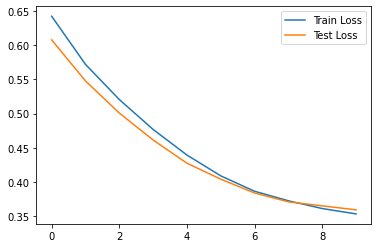

In [251]:
# Plot the history
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend()

## Evaluate the model

In [252]:
# Get the classification report
train_preds = (model.predict(X_train) >= 0.5).astype(float)
test_preds = (model.predict(X_test) >= 0.5).astype(float)
print('-'*19 + ' Train Metrics ' + '-'*19)
print(classification_report(train_preds, y_train))
print('\n' + '-'*20 + ' Test Metrics ' + '-'*19)
print(classification_report(test_preds, y_test))

------------------- Train Metrics -------------------
              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       291
         1.0       0.89      0.84      0.87       397

    accuracy                           0.85       688
   macro avg       0.85      0.85      0.85       688
weighted avg       0.85      0.85      0.85       688


-------------------- Test Metrics -------------------
              precision    recall  f1-score   support

         0.0       0.86      0.81      0.83       104
         1.0       0.85      0.89      0.87       126

    accuracy                           0.85       230
   macro avg       0.85      0.85      0.85       230
weighted avg       0.85      0.85      0.85       230



## Tuned Model

In [253]:
# Instantiate another model
model2 = Sequential()

In [254]:
# Add some hidden layers
model2.add(Dense(20, input_dim = input_nodes, activation = 'tanh'))
model2.add(Dense(20, activation = 'tanh'))
model2.add(Dense(20, activation = 'tanh'))
model2.add(Dense(1, activation = 'sigmoid'))

In [255]:
# Compile the model
model2.compile(loss = 'bce', optimizer = 'adam')

In [256]:
# Train the model
history = model2.fit(X_train, y_train, 
                    validation_data = (X_test, y_test),
                    epochs = 5)

Epoch 1/5
22/22 [==============================] - 1s 10ms/step - loss: 0.8104 - val_loss: 0.6627
Epoch 2/5
22/22 [==============================] - 0s 3ms/step - loss: 0.5863 - val_loss: 0.5082
Epoch 3/5
22/22 [==============================] - 0s 4ms/step - loss: 0.4578 - val_loss: 0.4143
Epoch 4/5
22/22 [==============================] - 0s 4ms/step - loss: 0.3884 - val_loss: 0.3754
Epoch 5/5
22/22 [==============================] - 0s 3ms/step - loss: 0.3622 - val_loss: 0.3632


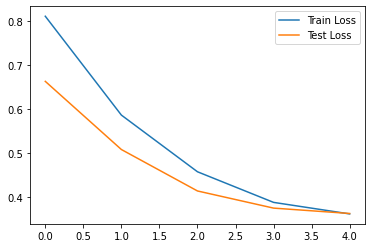

In [257]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend()

In [258]:
# Evaluate the models
# Get the classification report
train_preds = (model2.predict(X_train) >= 0.5).astype(float)
test_preds = (model2.predict(X_test) >= 0.5).astype(float)
print('-'*19 + ' Train Metrics ' + '-'*19)
print(classification_report(train_preds, y_train))
print('\n' + '-'*20 + ' Test Metrics ' + '-'*19)
print(classification_report(test_preds, y_test))

------------------- Train Metrics -------------------
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       304
         1.0       0.88      0.86      0.87       384

    accuracy                           0.85       688
   macro avg       0.85      0.85      0.85       688
weighted avg       0.86      0.85      0.85       688


-------------------- Test Metrics -------------------
              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83       107
         1.0       0.83      0.89      0.86       123

    accuracy                           0.85       230
   macro avg       0.85      0.84      0.85       230
weighted avg       0.85      0.85      0.85       230



## Another Tuned Model

In [259]:
# Instantiate the model
model3 = Sequential()

In [260]:
# Add the layers
model3.add(Dense(30, input_dim = input_nodes, activation = 'linear'))
model3.add(Dense(30, activation = 'linear'))
model3.add(Dense(30, activation = 'linear'))
model3.add(Dense(30, activation = 'linear'))
model3.add(Dense(1, activation = 'sigmoid'))

In [261]:
# Compile the model
model3.compile(loss = 'bce', optimizer = 'adam')

In [262]:
# Train the model
history = model3.fit(X_train, y_train,
           validation_data = (X_test, y_test),
           epochs = 10)

Epoch 1/10
22/22 [==============================] - 1s 10ms/step - loss: 0.5438 - val_loss: 0.3677
Epoch 2/10
22/22 [==============================] - 0s 3ms/step - loss: 0.3603 - val_loss: 0.3491
Epoch 3/10
22/22 [==============================] - 0s 3ms/step - loss: 0.3454 - val_loss: 0.3473
Epoch 4/10
22/22 [==============================] - 0s 4ms/step - loss: 0.3378 - val_loss: 0.3564
Epoch 5/10
22/22 [==============================] - 0s 4ms/step - loss: 0.3388 - val_loss: 0.3398
Epoch 6/10
22/22 [==============================] - 0s 5ms/step - loss: 0.3361 - val_loss: 0.3404
Epoch 7/10
22/22 [==============================] - 0s 4ms/step - loss: 0.3376 - val_loss: 0.3482
Epoch 8/10
22/22 [==============================] - 0s 5ms/step - loss: 0.3324 - val_loss: 0.3353
Epoch 9/10
22/22 [==============================] - 0s 4ms/step - loss: 0.3347 - val_loss: 0.3421
Epoch 10/10
22/22 [==============================] - 0s 4ms/step - loss: 0.3345 - val_loss: 0.3302


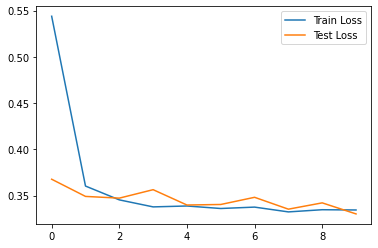

In [263]:
# Graph the history
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend()

In [264]:
# Get the classification report
train_preds = (model3.predict(X_train) >= 0.5).astype(float)
test_preds = (model3.predict(X_test) >= 0.5).astype(float)
print('-'*19 + ' Train Metrics ' + '-'*19)
print(classification_report(train_preds, y_train))
print('\n' + '-'*20 + ' Test Metrics ' + '-'*19)
print(classification_report(test_preds, y_test))

------------------- Train Metrics -------------------
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       291
         1.0       0.91      0.86      0.88       397

    accuracy                           0.87       688
   macro avg       0.87      0.87      0.87       688
weighted avg       0.87      0.87      0.87       688


-------------------- Test Metrics -------------------
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.86       103
         1.0       0.87      0.91      0.89       127

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230

